# Обучим модели для фиксированного n

Загрузим датасет

In [4]:
import pandas as pd

df = pd.read_csv('../data/distance_graph_dataset.csv')

In [5]:
df.sample(10)

,n,distribution,chromatic_number,clique_number,max_independent_set_size,domination_number,min_clique_cover_size
4784,50,1,21,20,5,46,6
3498,150,1,74,70,12,150,13
4021,300,1,135,129,11,296,12
3233,250,0,76,75,11,243,12
5821,250,0,74,74,12,241,15
9475,150,1,68,57,8,147,9
1925,250,1,112,105,10,242,12
4492,150,0,59,59,8,146,10
2215,350,0,121,120,12,331,13
4624,100,0,34,32,8,92,10


Отберем только данные, где `n = 500`

In [6]:
df = df[df['n'] == 500]

In [7]:
df.describe()

,n,distribution,chromatic_number,clique_number,max_independent_set_size,domination_number,min_clique_cover_size
count,873.0,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000
mean,500.0,0.515464,194.591065,185.193585,12.029782,489.584192,14.502864
std,0.0,0.500047,37.589023,31.463359,1.466454,7.888272,1.362271
min,500.0,0.000000,126.000000,120.000000,8.000000,436.000000,11.000000
25%,500.0,0.000000,158.000000,156.000000,11.000000,489.000000,14.000000
50%,500.0,1.000000,213.000000,182.000000,12.000000,491.000000,14.000000
75%,500.0,1.000000,230.000000,215.000000,13.000000,494.000000,15.000000
max,500.0,1.000000,257.000000,250.000000,17.000000,500.000000,20.000000


In [8]:
df = df.drop('n', axis=1)

In [9]:
df.sample(10)

,distribution,chromatic_number,clique_number,max_independent_set_size,domination_number,min_clique_cover_size
1974,1,230,228,12,495,16
1675,1,229,215,12,488,14
7033,0,162,162,12,494,14
5669,0,140,140,12,484,14
6455,0,146,146,12,491,14
8616,1,225,192,13,476,15
615,0,168,164,12,466,14
9985,1,225,217,10,489,13
1219,1,245,218,12,491,15
2640,1,228,208,12,491,14


Посмотрим на распределение признаков:

In [10]:
counts = df['distribution'].value_counts()
props = df['distribution'].value_counts(normalize=True)
print(counts, props)

distribution
1    450
0    423
Name: count, dtype: int64 distribution
1    0.515464
0    0.484536
Name: proportion, dtype: float64


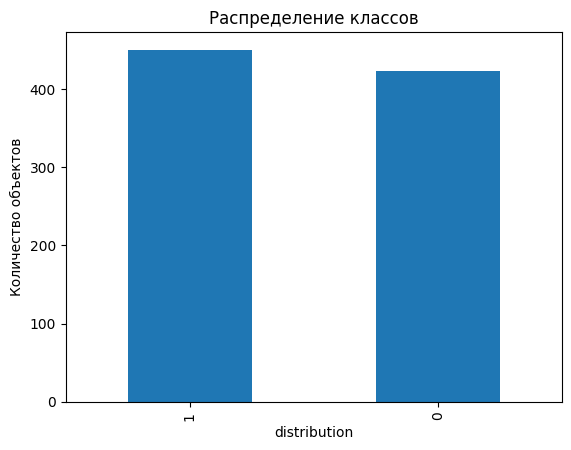

In [11]:
import matplotlib.pyplot as plt

counts.plot(kind='bar')
plt.title('Распределение классов')
plt.xlabel('distribution')
plt.ylabel('Количество объектов')
plt.show()

Распределение примерно одинаковое

In [12]:
RANDOM_STATE = 42
N = 100
target = 'distribution'

**Функции для вычисления мощности и ошибки первого рода**

In [13]:
from sklearn.metrics import confusion_matrix

def power_score(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    power = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    return power

def type1_err_score(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    type1_error = fp / (fp + tn) if (fp + tn) > 0 else 0.0
    return type1_error

## Обучим логистическую регрессию

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [16]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=RANDOM_STATE))
])

In [17]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(random_state=42))])

In [18]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
roc_auc   = roc_auc_score(y_test, y_proba)
power     = power_score(y_test, y_pred)
type1_err = type1_err_score(y_test, y_pred)

In [19]:
print(f'Accuracy:    {accuracy:.4f}')
print(f'Precision:   {precision:.4f}')
print(f'Recall:      {recall:.4f}')
print(f'F1-score:    {f1:.4f}')
print(f'ROC AUC:     {roc_auc:.4f}')
print(f'Power:       {power:.4f}')
print(f'Type 1 Error {type1_err:.4f}')

Accuracy:    1.0000
Precision:   1.0000
Recall:      1.0000
F1-score:    1.0000
ROC AUC:     1.0000
Power:       1.0000
Type 1 Error 0.0000


**Выведем коэффициенты модели, чтобы понять, какие признаки вносят наибольший вклад**

In [20]:
logreg = pipeline.named_steps['classifier']
importances = abs(logreg.coef_[0])
feature_names = X.columns.tolist()  

In [21]:
df_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

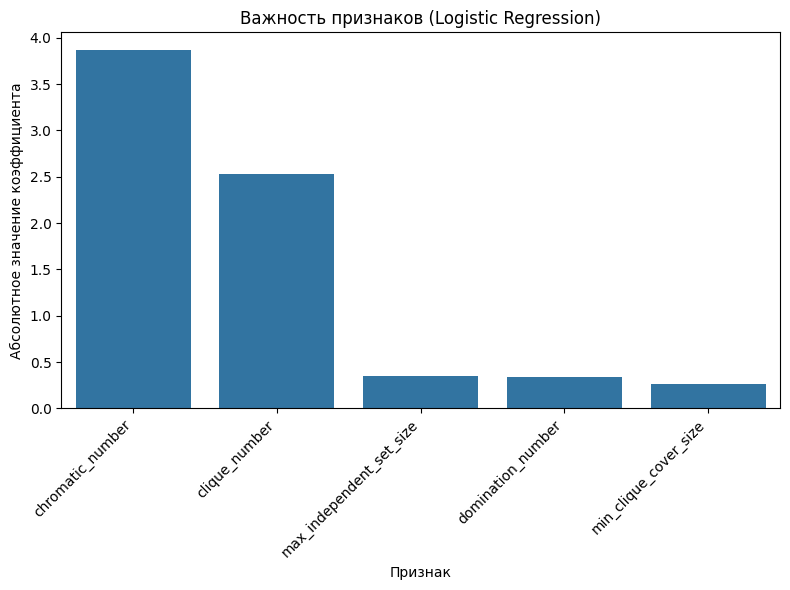

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_importance, 
    x='feature', 
    y='importance'
)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Признак')
plt.ylabel('Абсолютное значение коэффициента')
plt.title('Важность признаков (Logistic Regression)')
plt.tight_layout()
plt.show()

**Вывод:**

Для `n = 500` обычная линейная регрессия, без подбора гиперпараметров, показала очень хорошие метрики.\
Результаты:
* мощность: `1.0`
* ошибка первого рода: `0`
* самые важные признаки - `chromatic_number` и `clique_number`

Для достоверности результатов попробуем обучить еще несколько моделей.

## Обучим SVM с kernel='linear'

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [24]:
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [25]:
pipeline = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', probability=True, random_state=RANDOM_STATE)
)

In [26]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(kernel='linear', probability=True, random_state=42))])

In [27]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

In [28]:
print(f'Accuracy:      {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision:     {precision_score(y_test, y_pred):.4f}')
print(f'Recall:        {recall_score(y_test, y_pred):.4f}')
print(f'F1-score:      {f1_score(y_test, y_pred):.4f}')
print(f'ROC AUC:       {roc_auc_score(y_test, y_proba):.4f}')
print(f'Power:         {power_score(y_test, y_pred):.4f}')
print(f'Type 1 Error:  {type1_err_score(y_test, y_pred):.4f}')

Accuracy:      1.0000
Precision:     1.0000
Recall:        1.0000
F1-score:      1.0000
ROC AUC:       1.0000
Power:         1.0000
Type 1 Error:  0.0000


**Выведем коэффициенты модели, чтобы понять, какие признаки вносят наибольший вклад**

In [29]:
svc_model = pipeline.named_steps['svc']
importances = abs(svc_model.coef_[0])
feature_names = X.columns.tolist()  

In [30]:
df_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

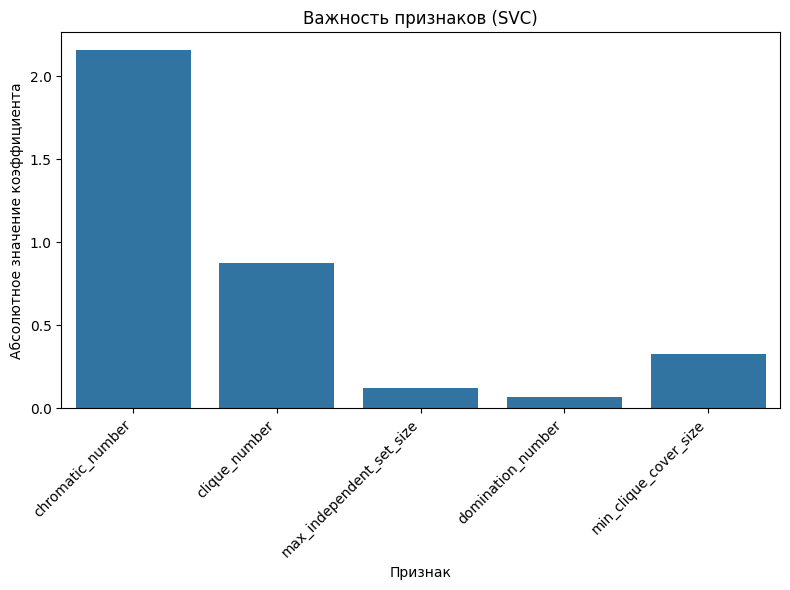

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_importance, 
    x='feature', 
    y='importance'
)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Признак')
plt.ylabel('Абсолютное значение коэффициента')
plt.title('Важность признаков (SVC)')
plt.tight_layout()
plt.show()

**Вывод:**

`SVM` показал аналогичные результаты, даже не пришлось запускать `RandomizedSearchCV`.
Результаты:
* мощность: `1.0`
* ошибка первого рода: `0`
* самый важный признак - `chromatic_number`

## RandomForest

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [33]:
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [34]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=RANDOM_STATE))
])

In [35]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestClassifier(random_state=42))])

In [36]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

In [37]:
print(f'Accuracy:      {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision:     {precision_score(y_test, y_pred):.4f}')
print(f'Recall:        {recall_score(y_test, y_pred):.4f}')
print(f'F1-score:      {f1_score(y_test, y_pred):.4f}')
print(f'ROC AUC:       {roc_auc_score(y_test, y_proba):.4f}')
print(f'Power:         {power_score(y_test, y_pred):.4f}')
print(f'Type 1 Error:  {type1_err_score(y_test, y_pred):.4f}')

Accuracy:      1.0000
Precision:     1.0000
Recall:        1.0000
F1-score:      1.0000
ROC AUC:       1.0000
Power:         1.0000
Type 1 Error:  0.0000


**Выведем коэффициенты модели, чтобы понять, какие признаки вносят наибольший вклад**

In [38]:
rf_model = pipeline.named_steps['rf']
importances = abs(rf_model.feature_importances_)
feature_names = X.columns.tolist()  

In [39]:
df_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

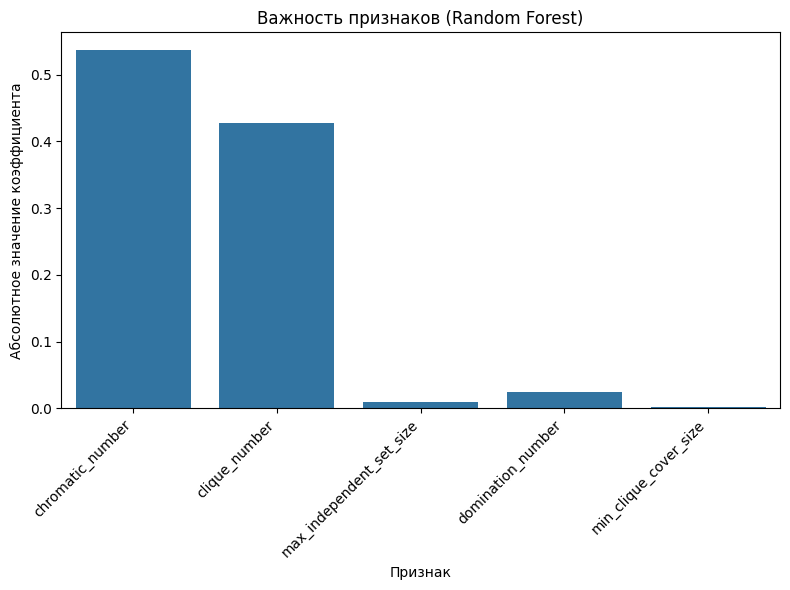

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_importance, 
    x='feature', 
    y='importance'
)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Признак')
plt.ylabel('Абсолютное значение коэффициента')
plt.title('Важность признаков (Random Forest)')
plt.tight_layout()
plt.show()

**Вывод:**

При `n == 500` даже `RandomForest` показал идеальные метрики качества, хотя при меньших `n` всегда показывал худшие результаты, чем другие модели.\
Результаты:
* мощность: `1.0`
* ошибка первого рода: `0`
* самый важный признак - `chromatic_number`

## Результаты
* мощность: `1.0`
* ошибка первого рода: `0`
* самый важный признак - `chromatic_number`

При достаточно больших `n = 500` все алгоритмы могут определить гипотезу с вероятностью, которая стремится к 100%.